# Monte Carlo Simulation is FUN!

## A friendly introduction without boring maths

The motivation behind this series of iPython notebooks is simple:

Statistics are generally taught (very) badly, especially the *really* important concepts.

I witnessed countless brilliant brains put to sleep in the typical Statistics training. (Mind you, these people are highly skilled engineers with brains that designed the most high end products in an insanely competitive market)

Words like 'Monte Carlo Simulations' became insanely sexy and hyped up. Actually they are real simple concepts.

My job here is to make Monte Carlo simulations unsexy and uncool. It should just become one of the tools in scientists and engineers arsenal.

by Ooi CY

In [1]:
import numpy as np               # import the necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Estimate the area of a circle by...... throwing darts?!

### 1.0) Introduction

![Mr. Monte Carlo gonna throw darts](1.0-unknown-circle-area.PNG)


1. Our friend, Mr. Monte Carlo has a **rectangle with a known area**, say, 100mm x 100mm = 10000mm-sq.

2. In the rectangle, there is a **circle with an unknown radius**, and Mr. Monte Carlo needs to estimate the circle's area.

3. We give Mr. Monte Carlo a box of million darts, so he can shoot darts at the rectangle randomly.

4. Some of the darts will land inside the circle. Some of the darts will land outside of the circle.

5. After throwing a large number of darts, say, **10,000 darts**. You counted **500 of those darts landed INSIDE the circle.**

6. You estimate that the circle area is ```500 / 10000 * 10000mm-sq = 500mm-sq```

This is a completely DIFFERENT approach towards "normal" math, isn't it?

### 1.1) "...But this approach is so stupid! And Mr. Monte Carlo will be SOOOO tired!"

![](1.0-tired-mr-monte-carlo.PNG)

I tend to agree. But it doesn't sound *THAT* silly anymore if:

1. Instead of a circle, what if the shape inside the box is a polygon with 35 edges?

2. Instead of an imaginary rectangle with an imaginary shape inside, what if this is a real world image processing problem, where you need to estimate the rate of deforestation from satellite images?

### 1.2) Let's go ahead and have fun with the code!

I coded some simple RectangleShape() and CircleShape() classes. Study the code below to see how the Monte Carlo circle area calculation works.

In [2]:
class RectangleShape():
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.area = self.calc_area()
        
    def calc_area(self):
        return self.width * self.height

In [3]:
big_rect = RectangleShape(0,0,100,100) # create a bigger rectangle at (0,0), width and height are both 100.
big_rect.area   # display the area value, it should be 100x100 = 10000

10000

In [4]:
class CircleShape():
    def __init__(self, x, y, radius):
        self.x = x
        self.y = y
        self.radius = radius
        self.area = self.calc_area()
        
    def calc_area(self):
        return np.pi * self.radius ** 2
    
    def is_in_circle(self, x, y):
        dist = np.sqrt((self.x - x)**2 + (self.y - y)**2)
        return dist <= self.radius

In [5]:
CircleShape(30,30,5).is_in_circle(32,32)    # to test whether the is_in_circle() function works: expected result: True

True

In [6]:
small_circle = CircleShape(x=30, y=30, radius=20)    # create a smaller circle at (30,30), with a radius of 20.
                                                     # So this circle sits INSIDE the bigger rectangle

What we are doing above is essentially this:

![](./1.0-unknown-circle-area-2.PNG)

In [7]:
print('True circle area: {:.2f}'.format(small_circle.area))

True circle area: 1256.64


In [8]:
N = 100000                          # how many darts should we throw?
in_circle_counter = 0               # how many random darts have landed inside the circle?
estimated_area_values = []          # we record the estimated area values here

for i in range(N):
    rand_x = np.random.uniform(big_rect.x, big_rect.x + big_rect.width)   # throw 1 random dart at (rand_x, rand_y)
    rand_y = np.random.uniform(big_rect.y, big_rect.y + big_rect.height)
    
    if small_circle.is_in_circle(rand_x, rand_y):     # if the random dart landed inside the circle,
        in_circle_counter += 1                        # increment counter          
    
    estimated_area_values.append(in_circle_counter / (i+1) * big_rect.area)  # record the estimated area value  

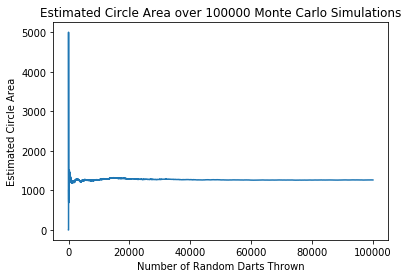

In [9]:
plt.plot(estimated_area_values)
plt.xlabel('Number of Random Darts Thrown')
plt.ylabel('Estimated Circle Area')
plt.title('Estimated Circle Area over {} Monte Carlo Simulations'.format(N));

In [10]:
estimated_area_values[-1]    # display the last estimated circle area value

1263.5

In [11]:
estimation_error = (estimated_area_values[-1] - small_circle.area) / small_circle.area

print('Real area: {:.2f}, Estimated area: {:.2f}, Error: {:.2%}'.format(small_circle.area,
                                                                       estimated_area_values[-1],
                                                                       estimation_error))

Real area: 1256.64, Estimated area: 1263.50, Error: 0.55%


### 1.3) We got a really good estimate!

The estimated area from the Monte Carlo method was *very, very* near to the true circle area value (the error is less than 1%)

Not bad at all for a dude spending 20 minutes playing with code! (*Patting my own back*)

### 1.4) Your turn

**Mr. Monte Carlo challenges you to:**

1. Play with the code above - what if the radius is 5, instead of 20? Is 100,000 random darts enough? Why?
2. What if your rectangle is much bigger, e.g. 1,000 x 1,000. Is 100,000 random darts enough? Why?
3. In the example above, I arbitarily decided the estimate is good enough based on the error of <1%. But if you do not know the TRUE area value, how would you decide that the Monte Carlo dart throwing process has already give you a good estimate?
4. Most importantly, have fun!